<a href="https://colab.research.google.com/github/CoAxLab/Data-Explorations/blob/main/book/exercises/regularized-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 17: Regularized regression

This homework assignment is designed to give you an intuition as an interesting property of regularization in the context of ultra-high dimensional statistical problems.

You won't need to load in any data for this homework.

---
## 1. Simulating & visualizing data (2 points)

We are going to be looking at what happens in the context where $p>n$. In order to have total control over our data, we will use simulations for this homework. First, we will need to load the `glmnet`, `tidyverse`, and `ggplot2` libraries for this assignment. 


In [3]:
library(glmnet)
library(tidyverse)
library(ggplot2)



We are going to generate a data set with complex structure and try to recover it using polynomial models. For simplicity sake, use the following code to produce a response variable, $y$ that has complex structure.

*Hint: Look up what a cosine function looks like if you need a reminder.*

In [4]:
# Generate data
set.seed(121)
sigma_noise = .5
x=seq(-9,9,by=.18)
n=length(x)
y = 0.1*x + cos(x) + cos(x/20)+rnorm(n,sd=sigma_noise)

(a) Break the data into a training set (n=50) and test set (n=51) using the `sample` function to randomly select subsets of x and y.  Make a separate data frame for the training and test data.

(**Note**: *Do not* just take the first 50 observations to be the training set and last 51 observations to be the test set.)

In [7]:
set.seed(42)
train_idx = sample(1:n, 50)
test_idx = setdiff(1:n, train_idx)

train_df = data.frame(x = x[train_idx], y = y[train_idx])
test_df = data.frame(x = x[test_idx], y = y[test_idx])

(b) Plot the training data ($x$ \& $y$). Describe the relationship that you see in the training data.

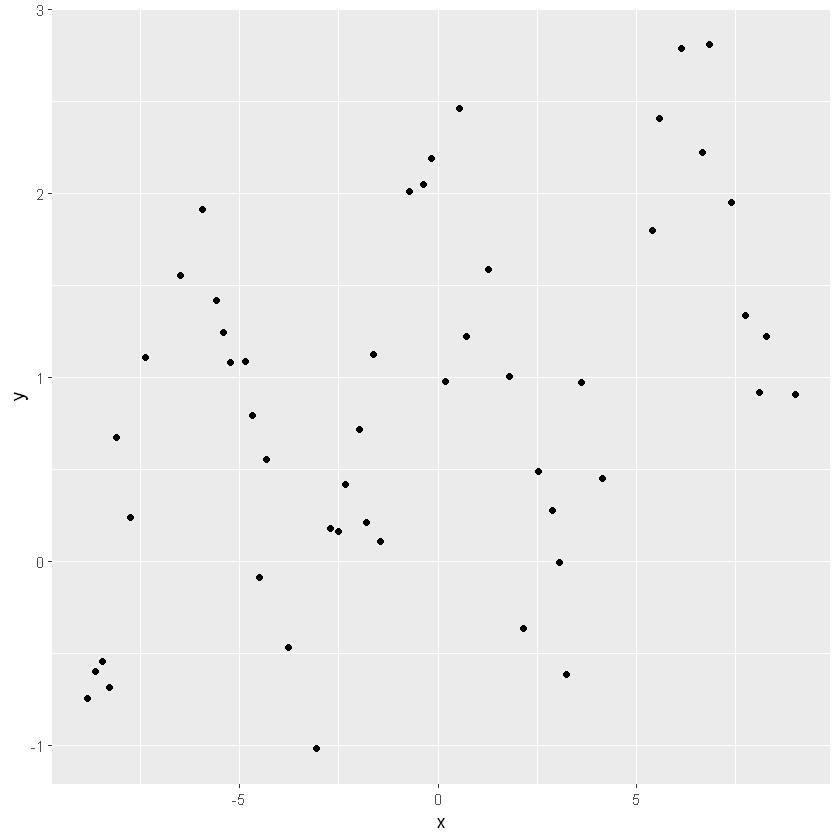

In [9]:
ggplot(train_df, aes(x = x, y = y)) +
  geom_point()


How would you describe the relationship between $x$ and $y$ based on this plot?

> The relationship appesrs to be non-linear and similar to that of a "vertical cosine" graph, with "ups and downs" about a vertical line
> 

---
## 2. Bias-variance tradeoff: polynomial regression (4 points)

Recall that in polynomial regression we increase model complexity by expanding $x$ out to the power $k$ (which we call degree).


$$Y = \hat{\beta}_0 + \sum_{j=1}^K \hat{\beta}_jX^j $$  

$$ = poly(x,k)$$

(a) Fit a 2nd degree polynomial regression model to the training data. Plot the results. 


*Hint: Use the* `help` *function to see how to use the* `stat_smooth()` *and* `poly()` *functions.*

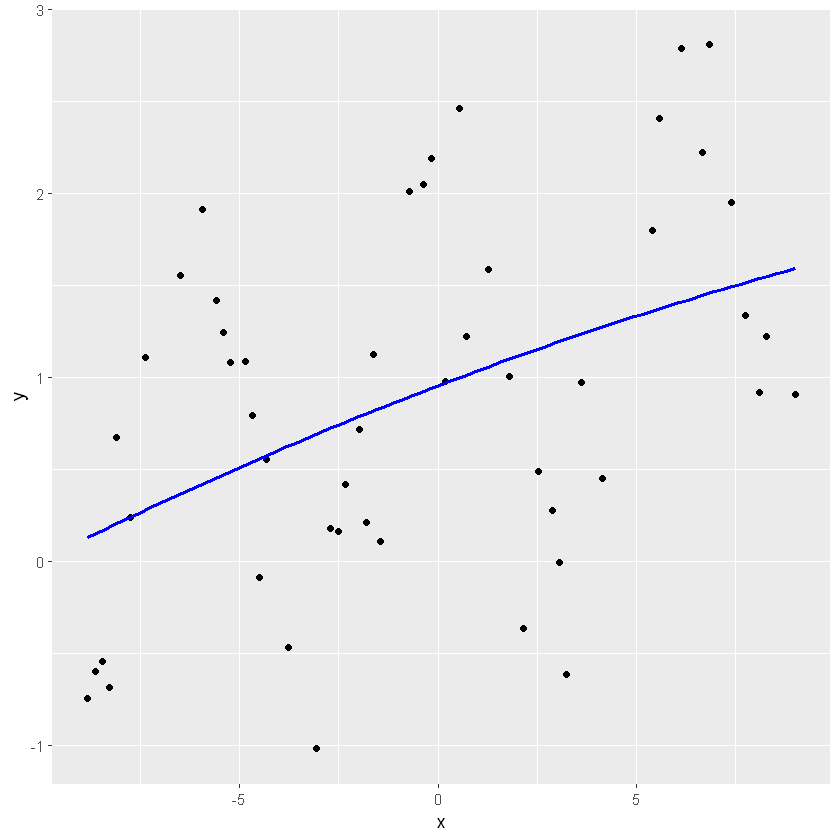

In [12]:
ggplot(train_df, aes(x = x, y = y)) +
  geom_point() +
  stat_smooth(method = "lm", formula = y ~ poly(x, 2), se = FALSE, color = "blue")


How well does this 2nd degree polynomial model qualitatively fit the data? Could it do better? 

> The 2nd degree model does not appear to fit the data, in fact, it appears to be near-linear. It could do much better
> 

(b) Fit a 12th degree polynomial to the data. Does this do qualitatively better or worse than the 2nd degree model?

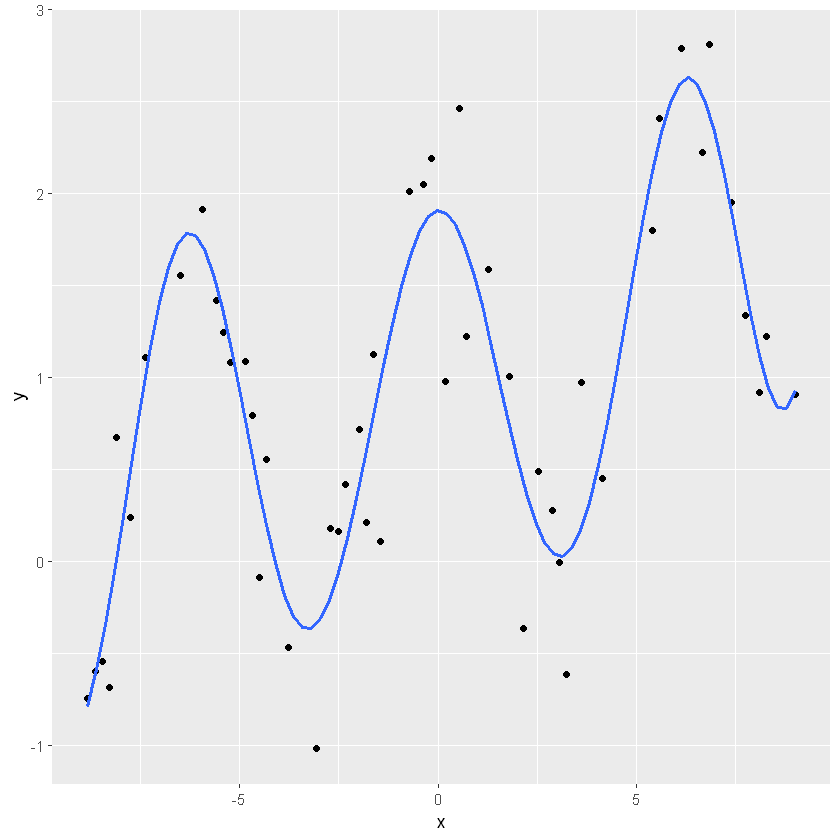

In [14]:
ggplot(train_df, aes(x = x, y = y)) +
  geom_point() +
  stat_smooth(method = "lm", formula = y ~ poly(x, 12), se = FALSE)


> Qualitatively, the 12th degree model performs much better, and captures the cosine shape relatively better than the 2nd degree model
> 

(c) Modify the loop below to estimate the bias-variance tradeoff as model complexity (i.e., degree of the polynomial model, $k$) increases from 2 to 50. Use the training data to fit the model and test data to evaluate its predictive accuracy. 

Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree. 


(**Note**: We are using median accuracies here because there are often 1 or 2 outlier values in the higher degree polynomial models that can throw off the accuracy estimates).

Warning message in predict.lm(model, newdata = train_df):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(model, newdata = test_df):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(model, newdata = train_df):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(model, newdata = test_df):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(model, newdata = train_df):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(model, newdata = test_df):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(model, newdata = train_df):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(model, newdata = test

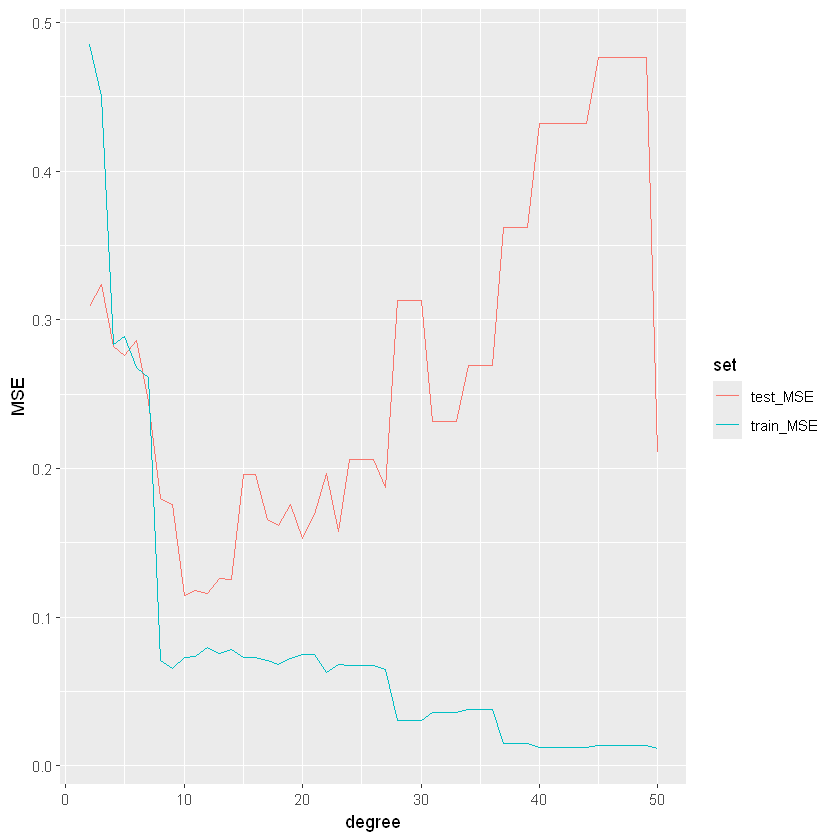

In [25]:
# Now do the variance-bias trade off analysis using regular regression
degree = seq(2,50)

# Need to setup your output vectors
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)

i = 1
for (k in degree) {
  model = lm(y ~ poly(x, k, raw = TRUE), data = train_df)
  
  pred_train = predict(model, newdata = train_df)
  pred_test = predict(model, newdata = test_df)
  
  train_rss[i] = median((train_df$y - pred_train)^2)
  test_rss[i] = median((test_df$y - pred_test)^2)
  
  i = i + 1
}


# Plot your results here
df_overfit = tibble( #pivot for gg
    degree, train_MSE = train_rss, test_MSE = test_rss)

df_overfit = pivot_longer(df_overfit, cols = c("train_MSE", "test_MSE"),
               names_to = "set", values_to = "MSE")

ggplot(df_overfit, aes(x = degree, y = MSE, color = set)) +
  geom_line()


What do you see as $k$ increase?

> As polynomial degree k increases, both training and test MSE initially decrease, reflecting improved model fit. Post k = 8, test error begins to rise while training error continues to drop, This indicates overfitting.
> 

(d) Now copy the code above and let's see what happens when we go beyond $p=n$ (remember, in this case $k=p$). Test polynomial models up to $k=150$. Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree. 

Use the `geom_vline()` function in `ggplot` to draw a vertical line where $k=n$ (here $n$ is the number of observations in the training set). This will make it clear where we cross the threshold for finding *unique* solutions in our data.



Warning message in predict.lm(model, newdata = train_df):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(model, newdata = test_df):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(model, newdata = train_df):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(model, newdata = test_df):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(model, newdata = train_df):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(model, newdata = test_df):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(model, newdata = train_df):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(model, newdata = test

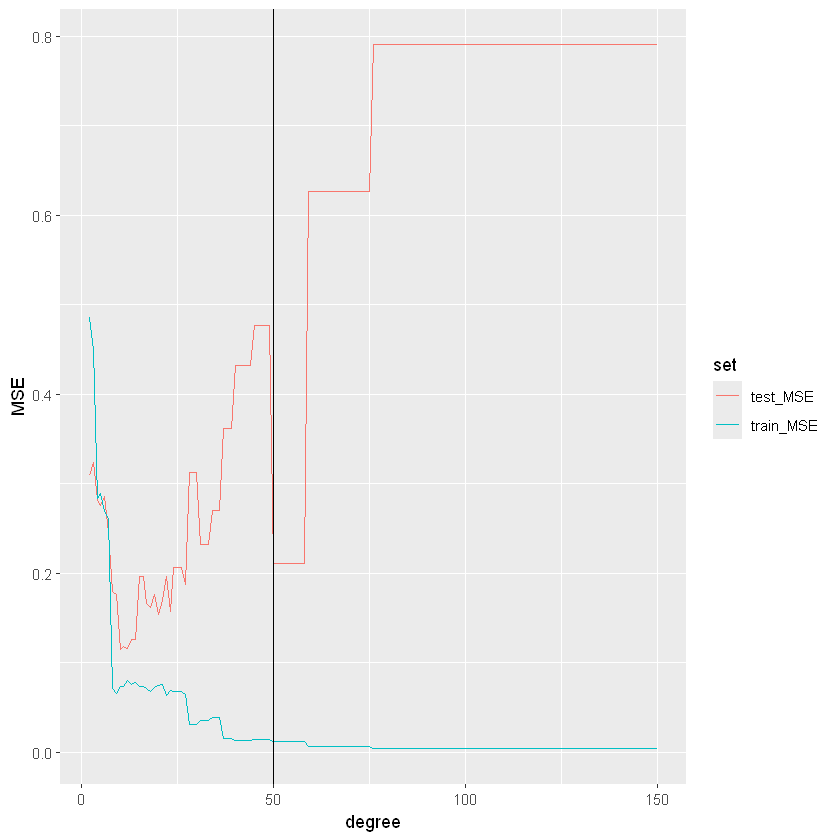

In [26]:
# Now do the variance-bias trade off analysis using regular regression
degree = seq(2,150)

# Need to setup your output vectors
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)

i = 1
for (k in degree) {
  model = lm(y ~ poly(x, k, raw = TRUE), data = train_df)
  
  pred_train = predict(model, newdata = train_df)
  pred_test = predict(model, newdata = test_df)
  
  train_rss[i] = median((train_df$y - pred_train)^2)
  test_rss[i] = median((test_df$y - pred_test)^2)
  
  i = i + 1
}


# Plot your results here
df_overfit = tibble( #pivot for gg
    degree, train_MSE = train_rss, test_MSE = test_rss)

df_overfit = pivot_longer(df_overfit, cols = c("train_MSE", "test_MSE"),names_to = "set", values_to = "MSE")

ggplot(df_overfit, aes(x = degree, y = MSE, color = set)) +
  geom_line() + geom_vline(xintercept = 50)



What do you see as $k$ gets larger than $n$?

> Test error drops for around 5-8 degrees, then rises extremely, depicting overfitting.
> 

---
## 3. Applying regularization to the model fits (2 points)

Repeat the previous bias-variance tradeoff test, going up to $k=150$, but now use ridge regression with a sparsity parameter of $\lambda=0.00005$. Plot your results the same way as last time. 

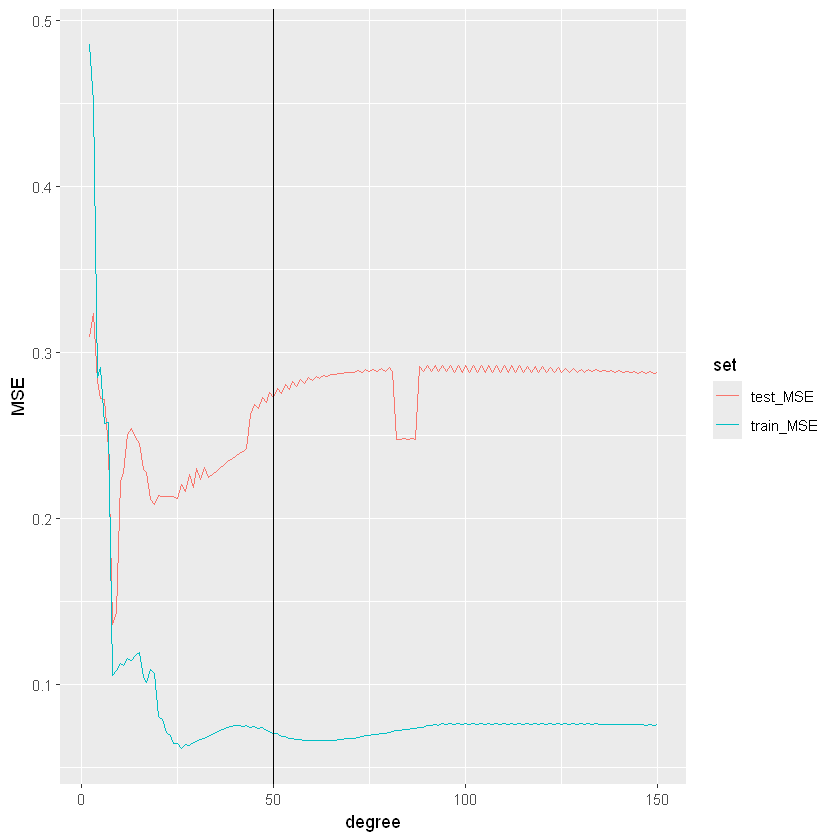

In [35]:
# Now do the variance-bias trade off analysis using ridge regression
lambda=0.00005
degree = seq(2,150)

rm(train_rss, test_rss)
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)

i = 1
for (k in degree) {
    fit_result = tryCatch({ #for errors
    X_train = model.matrix(y ~ poly(x, k, raw = TRUE), data = train_df)[, -1]
    X_test = model.matrix(y ~ poly(x, k, raw = TRUE), data = test_df)[, -1]
    y_train = train_df$y
    y_test = test_df$y
    
    ridge_model = glmnet(X_train, y_train, alpha = 0, lambda = lambda, standardize = TRUE)
    
    pred_train = predict(ridge_model, newx = X_train, s = lambda)
    pred_test = predict(ridge_model, newx = X_test, s = lambda)
    
    train_rss[i] = median((y_train - pred_train)^2)
    test_rss[i] = median((y_test - pred_test)^2)
  }, error = function(e) {
    train_rss[i] = NA
    test_rss[i] = NA
  })
  i = i + 1
}

df_ridge = tibble(degree, train_MSE = train_rss, test_MSE = test_rss)
df_ridge = pivot_longer(df_ridge, cols = c("train_MSE", "test_MSE"),names_to = "set", values_to = "MSE")

# Plot
ggplot(df_ridge, aes(x = degree, y = MSE, color = set)) +
  geom_line() +
  geom_vline(xintercept = 50)


What happens now when $k$ gets larger than $n$?

> Now, when k gets larger than n, the test MSE rises  bit, but then plataeus at the same value (apart from a sharp dip between 75 and 100 degrees)
> 

---
## 4. Reflection (2 points)

The simulations above should have shown that, when applying a regularization (i.e., a sparsity constraint), the behavior of the bias-variance tradeoff changes. Explain why this happens.

> This happens because regularization penalizes large coeffiencients. This trades some bias for a reduction in overfitting, preventing MSE from skyrocketing
> 

--- 
## Bonus (1 extra credit point)
Recall that the $p=n$ threshold defines the limit for finding a *unique* solution to $Y=F(X)$ (i.e., there is only one combination of regression coefficients that is *best* at explaining variance in $Y$). With this in mind, what is regularization doing that works around this upper limit?


> 

**DUE:** 5pm EST, April 10, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*